In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["figure.max_open_warning"] = False
np.random.seed(19680801)

In [2]:
def plot_ts(ax, t1_mean=1, t2_mean=-1, size=100):
    t1 = stats.norm(t1_mean).rvs(size=size)
    t2 = stats.norm(t2_mean).rvs(size=size)

    ax.plot(t1, label='$t_1$')
    ax.plot(t2, label='$t_2$')

    ax.set_xlabel('X-value')
    ax.set_ylabel('Y-value')
    ax.legend()
    return ax
    
def plot_many_ts(ax, nlines=5, size=100):
    for i in range(nlines):
        t = stats.norm(-i*2).rvs(size=size)
        ax.plot(t, label=f'$t_{i}$') 

    ax.set_xlabel('X-value')
    ax.set_ylabel('Y-value')
    ax.legend()
    return ax

def plot_histogram(ax, size=1000, xmean=0, xerr=1):
    rv = stats.norm(xmean, xerr)
    x = rv.rvs(size)
    
    bins = size // 2
    if bins > 100:
        bins = 100
        
    ax.hist(x, histtype="bar")
    
    ax.set_xlabel('X-value')
    ax.set_ylabel('Y-value')
    return ax
    
def plot_histograms(ax, size=1000, xmean=0, xerr=1):
    rv = stats.norm
    
    bins = size // 2
    if bins > 100:
        bins = 100
        
    ax.hist(rv.rvs(xmean, xerr, size), label=f"$\mu={xmean:.2f}, \sigma={xerr:.2f}$", alpha=0.5)
    ax.hist(rv.rvs(xmean-5, xerr*2, size), label=f"$\mu={xmean:.2f}, \sigma={xerr*2:.2f}$", alpha=0.5)
    ax.hist(rv.rvs(xmean+10, xerr*4, size), label=f"$\mu={xmean:.2f}, \sigma={xerr*4:.2f}$", alpha=0.5)
    
    ax.set_xlabel('X-value')
    ax.set_ylabel('Y-value')
    ax.legend()
    return ax
    
    
def plot_errorbar(ax, size=100, xmean=0, ymean=0, xerr=1, yerr=1, rho=0.75,
                  errorbar_kwargs=dict(fmt="o")
                 ):
    cov = [[2, rho],
           [rho, 2]]
    rv = stats.multivariate_normal([xmean, ymean], cov)
    sample = rv.rvs(size=size)
    
    x = sample[:, 0] + stats.norm(scale=xerr).rvs(len(sample))
    y = sample[:, 1] + stats.norm(scale=yerr).rvs(len(sample))

    ax.errorbar(x, y, xerr, yerr, **errorbar_kwargs)

    ax.set_xlabel('X-value')
    ax.set_ylabel('Y-value')
    return ax
    
def plot_showcase(max_cols=2, figsize=None, layout="equal"):
    default_width, default_height = plt.rcParams['figure.figsize']
    default_lw = plt.rcParams["lines.linewidth"]
    
    
    nplots = 5
    if layout == "equal":
        ncols = int(np.ceil(nplots / 2))
        if ncols > max_cols:
            ncols = max_cols
        nrows = int(np.ceil(nplots / ncols))
    elif layout == "row":
        nrows, ncols = 1, nplots
        
    figsize = figsize or (default_width*ncols, default_height*nrows)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = iter(axs.flatten())
    
    plot_ts(next(axs))
    plot_many_ts(next(axs))
    plot_histogram(next(axs))
    plot_histograms(next(axs))
    plot_errorbar(next(axs), errorbar_kwargs=dict(lw=default_lw/4, fmt="ko"))
    
    # Turn off remaning axes
    for ax in axs:
        ax.axis('off')
    
    return fig, axs

# Matplotlib Themes
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [3]:
# for style in plt.style.available:
#     with plt.style.context(style):
#         fig, axs = plot_showcase(layout="row")
#         fig.suptitle(style)

## Chosen Theme Set

`seaborn-poster`

In [4]:
# plt.style.use("seaborn-poster")
# plot_showcase()

# Personal Customization

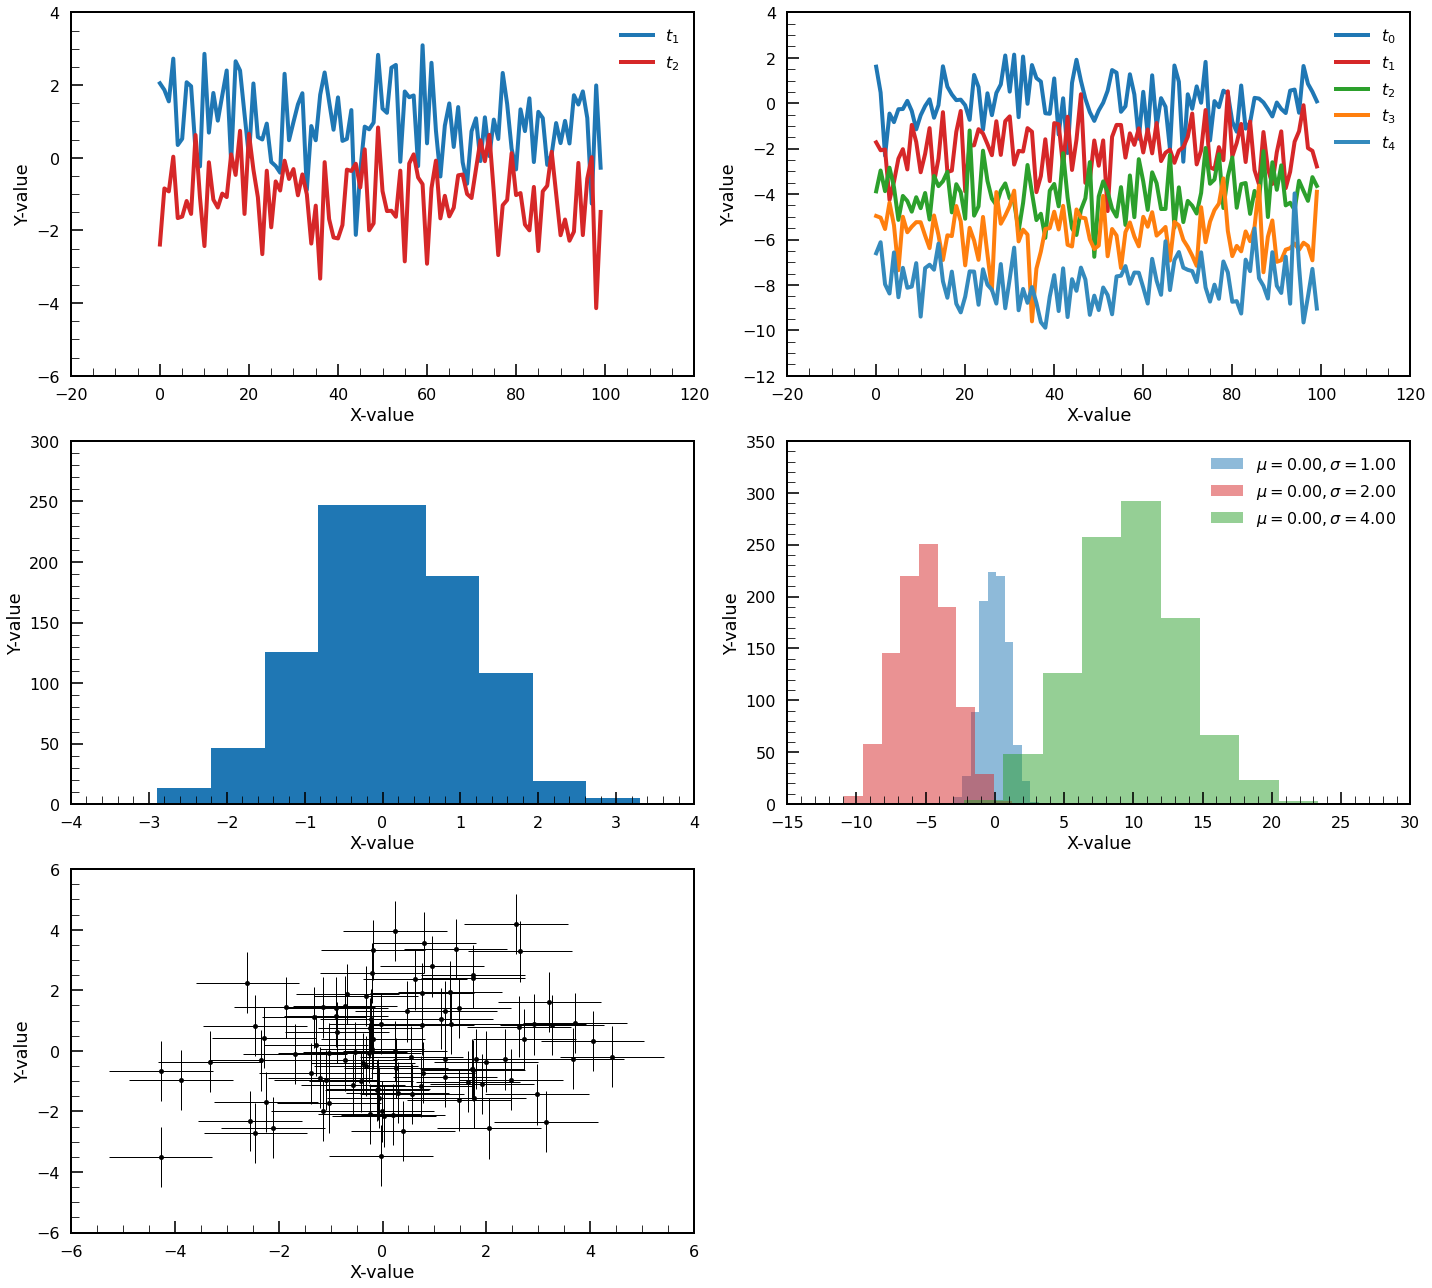

In [5]:
plt.style.use("seaborn-poster")
plt.style.use('style.mplstyle')
plot_showcase()
plt.tight_layout()